# PROFILING VARIABLES AND VISUALIZATIONS

<a id='0'></a> <br>
 # Table of Contents  

[Import Data and Libraries](#0.1)

1. [Profiling Variables](#1)     
    1. [Age](#2) 
        1. [Distribution of age_range](#3)
        1. [Distribution of age_group](#4)
    1. [Income](#5)
        1. [Distribution of income_group](#6)
    1. [Department](#7)
    1. [Product](#8)
    1. [Orders_day_of_week](#9)
    1. [Order_hour_of_day](#10)
    1. [Family Status](#11)
1. [Visualizations](#12)
    1. [Distribution of Customer Profiles](#13)
    1. [Distribution of departments](#14)
    1. [Distribution of Products](#15)
    1. [Customer Profile vs. Income Group ](#16)
    1. [Income Group vs. Department](#17)
    1. [Income Group vs. Age Group](#18)

<a id='0.1'></a> <br>
# Import Data and Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creates path

path = r'G:\My Drive\CareerFoundry\Python Projects\2023-10 Instacart Basket Analysis'

In [3]:
# imports latest dataframe (opc_merge_active)

df_opc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_merge_active.pkl'))

In [ ]:
# check results

df_opc.head()

In [ ]:
df_opc.shape

<a id='1'></a> <br>
# 1. Profiling Variables
## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [ ]:
# Imports department_wrangled df

dep_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [ ]:
# check results

dep_wrangled.head()

In [ ]:
# merges df_opc with dep_wrangled on 'department_id'

opc_dep = df_opc.merge(dep_wrangled, on = 'department_id')

In [ ]:
# check results

opc_dep.head(20)

In [ ]:
opc_dep.shape

In [ ]:
# exports opc_dep

opc_dep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_dep.pkl'))

## Closed script to save memory

In [4]:
# imports opc_dep

opc_dep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_dep.pkl'))

In [4]:
# check results

opc_dep.shape

(30964564, 29)

In [5]:
opc_dep.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,dependants,fam_status,income,region,max_order,low_activity_flag,department
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Female,Alabama,31,3,married,40423,South,10,keep,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,South,10,keep,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,South,10,keep,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,South,10,keep,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,3,married,40423,South,10,keep,beverages


### - New variables needed for profiling

<a id='2'></a> <br>
> # A. Age

In [5]:
opc_dep['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

####     Based the United Nation's Statistic Division  (https://unstats.un.org/unsd/publication/seriesm/seriesm_74e.pdf), the following age-ranges will be:
          - "18-24"
          - "25-34"
          - "35-44"
          - "45-54"
          - "55-64"
          - "65+"

In [6]:
# creates age_range column

opc_dep.loc[(opc_dep['age'] >= 18) & (opc_dep['age'] <= 24), 'age_range'] = '18-24'

In [7]:
opc_dep.loc[(opc_dep['age'] >= 25) & (opc_dep['age'] <= 34), 'age_range'] = '25-34'

In [8]:
opc_dep.loc[(opc_dep['age'] >= 35) & (opc_dep['age'] <= 44), 'age_range'] = '35-44'

In [9]:
opc_dep.loc[(opc_dep['age'] >= 45) & (opc_dep['age'] <= 54), 'age_range'] = '45-54'

In [10]:
opc_dep.loc[(opc_dep['age'] >= 55) & (opc_dep['age'] <= 64), 'age_range'] = '55-64'

In [11]:
opc_dep.loc[opc_dep['age'] >= 65, 'age_range'] = '65+'

In [12]:
# check results

opc_dep['age_range'].value_counts(dropna = False)

age_range
65+      8195544
45-54    4887564
35-44    4836674
25-34    4827101
55-64    4802487
18-24    3415194
Name: count, dtype: int64

<a id='3'></a> <br>
>> # a. Distribution of age_range

In [13]:
# create crosstab of age_range and user_id

ct_age_range_distr = pd.crosstab(opc_dep['age_range'], opc_dep['user_id'])

In [14]:
ct_age_range_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
age_range,,,,,,,,,,,,,,,,,,,,,
18-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25-34,59,143,0,103,1092,0,0,52,0,0,...,0,0,173,0,0,0,0,0,0,0
35-44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,141,0,50,128,21,329
45-54,0,0,0,0,0,114,813,0,42,135,...,0,0,0,56,0,0,0,0,0,0
55-64,0,0,27,0,0,0,0,0,0,0,...,0,281,0,0,0,0,0,0,0,0
65+,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,164,0,0,0,0


In [15]:
# changes all data greater than 0 to 1 - I only need one instance of the user_id in each age_range

ct_age_range_distr[ct_age_range_distr > 0] = 1

In [16]:
# check results

ct_age_range_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
age_range,,,,,,,,,,,,,,,,,,,,,
18-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25-34,1,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
35-44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
45-54,0,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
55-64,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
65+,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [17]:
# creates a Total column

ct_age_range_distr['Total'] = ct_age_range_distr.sum(axis=1)

In [18]:
# check output

ct_age_range_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,99990,99991,99992,99993,99994,99995,99996,99998,99999,Total
age_range,,,,,,,,,,,,,,,,,,,,,
18-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17766
25-34,1,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,25385
35-44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,1,25237
45-54,0,0,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,25703
55-64,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,25290
65+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,43250


In [19]:
17766 + 25385 + 25237 + 25703 + 25290 + 43250

162631

In [ ]:
# Unique user_id total and Total column are equal

In [20]:
# Remove all columns except Total

ct_age_range_distr = ct_age_range_distr[['Total']]

In [21]:
# check output

ct_age_range_distr

user_id,Total
age_range,
18-24,17766
25-34,25385
35-44,25237
45-54,25703
55-64,25290
65+,43250


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '18-24'),
  Text(1, 0, '25-34'),
  Text(2, 0, '35-44'),
  Text(3, 0, '45-54'),
  Text(4, 0, '55-64'),
  Text(5, 0, '65+')])

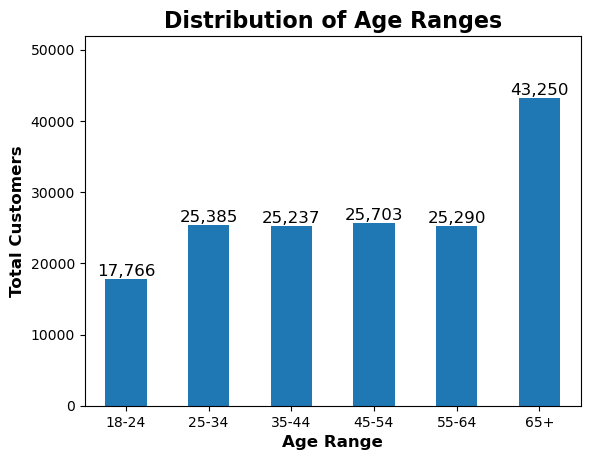

In [22]:
bar_age_range_distr = ct_age_range_distr.sort_index().plot.bar(legend=None)
for age_range in bar_age_range_distr.containers:
    
    # adds commas
    for c in bar_age_range_distr.containers:
        bar_age_range_distr.bar_label(c, fmt='{:,.0f}', fontweight='medium', fontsize=12)

# adds 20% whitespace to margins to keep labels inside the box
bar_age_range_distr.margins(x=0.2, y=0.2)

plt.xlabel('Age Range', fontsize=12, fontweight='bold')
plt.ylabel('Total Customers', fontsize=12, fontweight='bold')
plt.title('Distribution of Age Ranges', fontsize=16, fontweight='bold')

plt.xticks(rotation = 360)

In [ ]:
# Export bar chart

bar_age_range_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_range_distr.png'))

<a id='4'></a> <br>
>> # b. Distribution of age_group

In [23]:
# creates age_group category (Young, Middle aged, Older)

opc_dep.loc[(opc_dep['age'] >= 18) & (opc_dep['age'] <= 39), 'age_group'] = 'Young'

In [24]:
opc_dep.loc[(opc_dep['age'] >= 40) & (opc_dep['age'] <= 59), 'age_group'] = 'Middle aged'

In [25]:
opc_dep.loc[opc_dep['age'] >= 60, 'age_group'] = 'Older'

In [26]:
# create crosstab of age_group and user_id

ct_age_grp_distr = pd.crosstab(opc_dep['age_group'], opc_dep['user_id']).reindex(['Young', 'Middle aged', 'Older'])

In [27]:
# check output

ct_age_grp_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
age_group,,,,,,,,,,,,,,,,,,,,,
Young,59,143,0,103,1092,0,0,52,0,0,...,0,0,173,0,141,0,0,0,21,0
Middle aged,0,0,0,0,0,114,813,0,42,135,...,0,281,0,56,0,0,50,128,0,329
Older,0,0,27,0,0,0,0,0,0,0,...,14,0,0,0,0,164,0,0,0,0


In [28]:
# changes all data greater than 0 to 1 - I only need one instance of the user_id in each age_group 

ct_age_grp_distr[ct_age_grp_distr > 0] = 1

In [29]:
# check output

ct_age_grp_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
age_group,,,,,,,,,,,,,,,,,,,,,
Young,1,1,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
Middle aged,0,0,0,0,0,1,1,0,1,1,...,0,1,0,1,0,0,1,1,0,1
Older,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [30]:
# creates a Total column

ct_age_grp_distr['Total'] = ct_age_grp_distr.sum(axis=1)

In [31]:
# check output

ct_age_grp_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,99990,99991,99992,99993,99994,99995,99996,99998,99999,Total
age_group,,,,,,,,,,,,,,,,,,,,,
Young,1,1,0,1,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,55660
Middle aged,0,0,0,0,0,1,1,0,1,1,...,1,0,1,0,0,1,1,0,1,51198
Older,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,55773


In [32]:
51198 + 55773 + 55660

162631

In [ ]:
# Unique user_id total and Total column are equal

In [33]:
# Remove all columns except Total

ct_age_grp_distr = ct_age_grp_distr[['Total']]

In [34]:
# check output 

ct_age_grp_distr

user_id,Total
age_group,
Young,55660
Middle aged,51198
Older,55773


(array([0, 1, 2]),
 [Text(0, 0, 'Young'), Text(1, 0, 'Middle aged'), Text(2, 0, 'Older')])

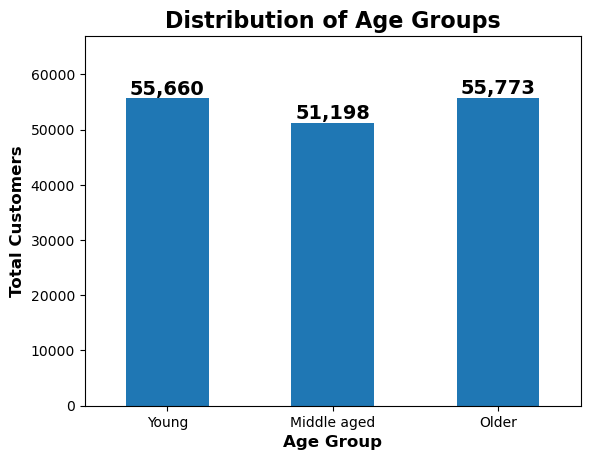

In [35]:
bar_age_group_distr = ct_age_grp_distr.plot.bar(legend=None)
for age_group in bar_age_group_distr.containers:
    
    # adds commas
    for c in bar_age_group_distr.containers:
        bar_age_group_distr.bar_label(c, fmt='{:,.0f}', fontweight='bold', fontsize=14)

# adds 20% whitespace to margins to keep labels inside the box
bar_age_group_distr.margins(x=0.2, y=0.2)

plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('Total Customers', fontsize=12, fontweight='bold')
plt.title('Distribution of Age Groups', fontsize=16, fontweight='bold')

plt.xticks(rotation = 360)

In [ ]:
# Export bar chart

bar_age_group_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group_distr.png'))

<a id='5'></a> <br>
> # B. Income

In [6]:
opc_dep['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [36]:
# establish income categories based on mean and std (+1, -1)

in_mean = 99676
in_std = 43142

In [ ]:
# check outputs

in_mean

In [ ]:
in_std

In [37]:
# create 3 income categories (low, middle, high)

opc_dep.loc[opc_dep['income'] <= (in_mean - in_std), 'income_group'] = 'Low income'

In [38]:
opc_dep.loc[(opc_dep['income'] > (in_mean - in_std)) & (opc_dep['income'] <= (in_mean + in_std)), 'income_group'] = 'Middle income'

In [39]:
opc_dep.loc[opc_dep['income'] > (in_mean + in_std), 'income_group'] = 'High income'

In [40]:
# check ouputs

opc_dep['income_group'].value_counts(dropna = False)

income_group
Middle income    20923160
High income       5173082
Low income        4868322
Name: count, dtype: int64

<a id='6'></a> <br>
>> # a. Distribution of income_group

In [41]:
# create crosstab of income_group and user_id

ct_inc_grp_distr = pd.crosstab(opc_dep['income_group'], opc_dep['user_id']).reindex(['Low income', 'Middle income', 'High income'])

In [42]:
# check output

ct_inc_grp_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
income_group,,,,,,,,,,,,,,,,,,,,,
Low income,59,143,0,0,0,0,0,52,42,0,...,0,0,0,0,141,0,0,0,0,329
Middle income,0,0,27,103,1092,114,813,0,0,135,...,0,281,173,56,0,164,50,128,21,0
High income,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0


In [43]:
# changes all data greater than 0 to 1 - I only need one instance of the user_id in each age_group 

ct_inc_grp_distr[ct_inc_grp_distr > 0] = 1

In [44]:
# check output

ct_inc_grp_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
income_group,,,,,,,,,,,,,,,,,,,,,
Low income,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
Middle income,0,0,1,1,1,1,1,0,0,1,...,0,1,1,1,0,1,1,1,1,0
High income,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
# create Total column

ct_inc_grp_distr['Total'] = ct_inc_grp_distr.sum(axis=1)

In [46]:
# check output

ct_inc_grp_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,99990,99991,99992,99993,99994,99995,99996,99998,99999,Total
income_group,,,,,,,,,,,,,,,,,,,,,
Low income,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,33667
Middle income,0,0,1,1,1,1,1,0,0,1,...,1,1,1,0,1,1,1,1,0,103678
High income,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25286


In [47]:
33667 + 103678 + 25286

162631

In [ ]:
# Unique user_id total and Total column are equal

In [48]:
# Remove all columns except Total

ct_inc_grp_distr = ct_inc_grp_distr[['Total']]

In [49]:
# check ouput

ct_inc_grp_distr

user_id,Total
income_group,
Low income,33667
Middle income,103678
High income,25286


(array([0, 1, 2]),
 [Text(0, 0, 'Low income'),
  Text(1, 0, 'Middle income'),
  Text(2, 0, 'High income')])

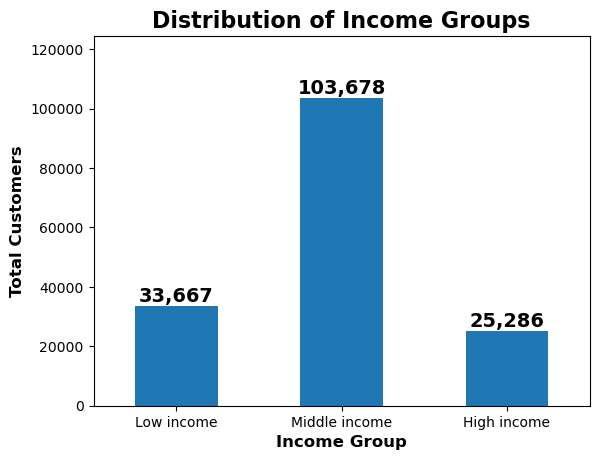

In [50]:
bar_inc_group_distr = ct_inc_grp_distr.plot.bar(legend=None)
for income_group in bar_inc_group_distr.containers:
    
    # adds commas
    for c in bar_inc_group_distr.containers:
        bar_inc_group_distr.bar_label(c, fmt='{:,.0f}', fontweight='bold', fontsize=14)

# adds 20% whitespace to margins to keep labels inside the box
bar_inc_group_distr.margins(x=0.2, y=0.2)

plt.xlabel('Income Group', fontsize=12, fontweight='bold')
plt.ylabel('Total Customers', fontsize=12, fontweight='bold')
plt.title('Distribution of Income Groups', fontsize=16, fontweight='bold')

plt.xticks(rotation = 360)

In [ ]:
# Export bar chart

bar_inc_group_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_inc_group_distr.png'), bbox_inches='tight')

<a id='7'></a> <br>
> # C. Department

In [ ]:
# groupby user id and find most common value of department

fav_dep = opc_dep.groupby('user_id')['department'].apply(lambda x: x.mode()[0])

In [ ]:
# check ouput

fav_dep.head()

In [ ]:
fav_dep.shape

In [ ]:
# export fav_dep to csv

fav_dep.to_csv(os.path.join(path, '02 Data','Prepared Data', 'fav_dep.csv'))

In [ ]:
# imports fav_dep as dataframe

fav_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fav_dep.csv'))

In [ ]:
fav_dep.head()

In [ ]:
# rename department to most_frequent_department

fav_dep = fav_dep.rename(columns={'department': 'most_freq_dept'})

In [ ]:
# check ouput

fav_dep.head()

In [ ]:
fav_dep.dtypes

In [ ]:
# Change user_id dt to merge with opc_dep

fav_dep['user_id'] = fav_dep['user_id'].astype('str')

In [ ]:
# merges opc_dep with fav_dep on user_id

opc_dep_2 = opc_dep.merge(fav_dep, on = 'user_id')

In [ ]:
# check ouput

opc_dep_2.shape

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
opc_dep_2.head()

<a id='8'></a> <br>
> # D. Product

In [ ]:
# groupby user id and find most common value of product_name

fav_prod = opc_dep.groupby('user_id')['product_name'].apply(lambda x: x.mode()[0])

In [ ]:
# check ouput

fav_prod.head()

In [ ]:
fav_prod.shape

In [ ]:
# export fav_prod to csv

fav_prod.to_csv(os.path.join(path, '02 Data','Prepared Data', 'fav_prod.csv'))

In [ ]:
# imports fav_prod as dataframe

fav_prod = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fav_prod.csv'))

In [ ]:
# check ouput

fav_prod.head()

In [ ]:
fav_prod.shape

In [ ]:
# Change user_id dt to merge with opc_dep_2

fav_prod['user_id'] = fav_prod['user_id'].astype('str')

In [ ]:
# merges opc_dep_2 with fav_prod on user_id

opc_dep_3 = opc_dep_2.merge(fav_prod, on = 'user_id')

In [ ]:
# check ouput

opc_dep_3.head()

In [ ]:
# export opc_dep_3 to pkl

opc_dep_3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_dep_3.pkl'))

In [ ]:
# imports latest dataframe (opc_dep_3)

opc_dep_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_dep_3.pkl'))

In [ ]:
# check ouput

opc_dep_3.shape

In [ ]:
# rename product_name_x to product_name, product_name_y to most_ordered_product

opc_dep_3 = opc_dep_3.rename(columns={'product_name_x': 'product_name', 'product_name_y': 'most_ordered_product'})

In [ ]:
# check ouput

opc_dep_3.columns

<a id='9'></a> <br>
> # E. Orders_day_of_week

In [ ]:
# groupby user id and find most common orders_day_of_week

freq_dow = opc_dep_3.groupby('user_id')['orders_day_of_week'].apply(lambda x: x.mode()[0])

In [ ]:
# check ouput

freq_dow

In [ ]:
# export freq_dow to csv

freq_dow.to_csv(os.path.join(path, '02 Data','Prepared Data', 'freq_dow.csv'))

In [ ]:
# imports freq_dow

freq_dow = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'freq_dow.csv'))

In [ ]:
# check ouput

freq_dow.head()

In [ ]:
# Change user_id dt to merge with opc_dep_3

freq_dow['user_id'] = freq_dow['user_id'].astype('str')

In [ ]:
# rename orders_day_of_week to most_freq_day

freq_dow = freq_dow.rename(columns={'orders_day_of_week': 'most_freq_day'})

In [ ]:
# merges opc_dep_3 with freq_dow on user_id

opc_dep_4 = opc_dep_3.merge(freq_dow, on = 'user_id')

In [ ]:
# check ouput

opc_dep_4.head()

In [ ]:
# creates fav_time_to_shop column

opc_dep_4.loc[(opc_dep_4['most_freq_day'] == 0) | (opc_dep_4['most_freq_day'] == 5) | (opc_dep_4['most_freq_day'] == 6), 'fav_time_to_shop'] = 'Weekends'

In [ ]:
opc_dep_4.loc[(opc_dep_4['most_freq_day'] >= 1) & (opc_dep_4['most_freq_day'] <= 4), 'fav_time_to_shop'] = 'Weekdays'

In [ ]:
# check ouput

opc_dep_4.head()

In [ ]:
# rename fav_time_to_shop

opc_dep_4 = opc_dep_4.rename(columns={'fav_time_to_shop': 'fav_day_to_shop'})

In [ ]:
# check ouput

opc_dep_4.columns

<a id='10'></a> <br>
> # F. Order_hour_of_day

In [ ]:
# groupby order id and find most_freq_hod

fav_hod = opc_dep_4.groupby('user_id')['order_hour_of_day'].apply(lambda x: x.mode()[0])

In [ ]:
# check ouput

fav_hod

In [ ]:
# export fav_hod to csv

fav_hod.to_csv(os.path.join(path, '02 Data','Prepared Data', 'fav_hod.csv'))

In [ ]:
# imports fav_hod as df

fav_hod = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fav_hod.csv'))

In [ ]:
# Change user_id dt to merge with opc_dep_4

fav_hod['user_id'] = fav_hod['user_id'].astype('str')

In [ ]:
# merges opc_dep_4 with fav_hod on user_id

opc_dep_5 = opc_dep_4.merge(fav_hod, on = 'user_id')

In [ ]:
# check ouput

opc_dep_5.head()

In [ ]:
# rename fav_time_to_shop

opc_dep_5 = opc_dep_5.rename(columns={'order_hour_of_day_y': 'most_freq_hour'})

In [ ]:
# check ouput

opc_dep_5.head()

In [ ]:
# creates fav_time_to_shop column
# 5-11 = Morning, 12-16 = Afternoon, 0-4/17-23 = Night

opc_dep_5.loc[(opc_dep_5['most_freq_hour'] >= 5) & (opc_dep_5['most_freq_hour'] <= 11), 'fav_time_to_shop'] = 'Morning'

In [ ]:
opc_dep_5.loc[(opc_dep_5['most_freq_hour'] >= 12) & (opc_dep_5['most_freq_hour'] <= 16), 'fav_time_to_shop'] = 'Afternoon'

In [ ]:
opc_dep_5.loc[(opc_dep_5['most_freq_hour'] >= 17) & (opc_dep_5['most_freq_hour'] <= 23) | (opc_dep_5['most_freq_hour'] >= 0) & (opc_dep_5['most_freq_hour'] <= 4), 'fav_time_to_shop'] = 'Night'

In [ ]:
# check ouput

opc_dep_5.head()

In [ ]:
# export opc_dep_5

opc_dep_5.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_dep_5.pkl'))

In [ ]:
# imports opc_dep_5

opc_dep_5 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'opc_dep_5.pkl'))

In [ ]:
# shows all columns

pd.set_option('display.max_columns', None)

In [ ]:
# check ouput

opc_dep_5.head()

In [ ]:
opc_dep_5.shape

<a id='11'></a> <br>
> # G. Family Status

In [ ]:
# creates multi-index crosstab

ct_fam_status = pd.crosstab([opc_dep_5['age_group'], opc_dep_5['fam_status']], opc_dep_5['dependants'])

In [ ]:
# check ouput

ct_fam_status

#### Based on ct2 crosstab, I will create the following profiles:

   - 'Young single adult', 'Middle aged single adult', 'Older single adult' = div or single
     and y or ma or older and 0 dependants
   - 'Young single parent' = y and living with parents and 1+ dependants
   - 'Young married parent', 'Middle aged married parent', 'Older married parent' = y or ma or older and married and 1+ 
     dependants

In [ ]:
# creates and imputes customer_profile column
# Young single adult

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'single') & (opc_dep_5['age_group'] == 'Young') & (opc_dep_5['dependants'] == 0), 'customer_profile'] = 'Young single adult'

In [ ]:
# Middle aged single adult

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'single') & (opc_dep_5['age_group'] == 'Middle aged') & (opc_dep_5['dependants'] == 0), 'customer_profile'] = 'Middle aged single adult'

In [ ]:
# Older single adult

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'divorced/widowed') & (opc_dep_5['age_group'] == 'Older') & (opc_dep_5['dependants'] == 0), 'customer_profile'] = 'Older single adult'

In [ ]:
# Young single parent

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'living with parents and siblings') & (opc_dep_5['age_group'] == 'Young') & (opc_dep_5['dependants'] >= 1), 'customer_profile'] = 'Young single parent'

In [ ]:
# Young married parent

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'married') & (opc_dep_5['age_group'] == 'Young') & (opc_dep_5['dependants'] >= 1), 'customer_profile'] = 'Young married parent'

In [ ]:
# Middle aged married parent

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'married') & (opc_dep_5['age_group'] == 'Middle aged') & (opc_dep_5['dependants'] >= 1), 'customer_profile'] = 'Middle aged married parent'

In [ ]:
# Older married parent

opc_dep_5.loc[(opc_dep_5['fam_status'] == 'married') & (opc_dep_5['age_group'] == 'Older') & (opc_dep_5['dependants'] >= 1), 'customer_profile'] = 'Older married parent'

In [ ]:
# check ouput

opc_dep_5.head()

In [ ]:
opc_dep_5['customer_profile'].value_counts(dropna = False)

<a id='12'></a> <br>
# 2. Visualizations
# Create an appropriate visualization to show the distribution of profiles.

<a id='13'></a> <br>
> # A. Distribution of Customer Profiles

In [4]:
# create crosstab of customer_profile and user_id

ct_cprofile_distr = pd.crosstab(opc_dep_5['customer_profile'], opc_dep_5['user_id'])

In [5]:
# check ouput

ct_cprofile_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
customer_profile,,,,,,,,,,,,,,,,,,,,,
Middle aged married parent,0,0,0,0,0,114,813,0,42,135,...,0,281,0,0,0,0,50,128,0,329
Middle aged single adult,0,0,0,0,0,0,0,0,0,0,...,0,0,0,56,0,0,0,0,0,0
Older married parent,0,0,27,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
Older single adult,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,164,0,0,0,0
Young married parent,59,143,0,103,0,0,0,0,0,0,...,0,0,173,0,0,0,0,0,21,0
Young single adult,0,0,0,0,1092,0,0,52,0,0,...,0,0,0,0,141,0,0,0,0,0
Young single parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# changes all data greater than 0 to 1 - I only need one instance of the user_id in each customer_profile

ct_cprofile_distr[ct_cprofile_distr > 0] = 1

In [7]:
# check output

ct_cprofile_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,9999,99990,99991,99992,99993,99994,99995,99996,99998,99999
customer_profile,,,,,,,,,,,,,,,,,,,,,
Middle aged married parent,0,0,0,0,0,1,1,0,1,1,...,0,1,0,0,0,0,1,1,0,1
Middle aged single adult,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Older married parent,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Older single adult,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Young married parent,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
Young single adult,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Young single parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# create Total column

ct_cprofile_distr['Total'] = ct_cprofile_distr.sum(axis=1)

In [9]:
# check output

ct_cprofile_distr

user_id,1,10,100,1000,10000,100000,100001,100002,100004,100005,...,99990,99991,99992,99993,99994,99995,99996,99998,99999,Total
customer_profile,,,,,,,,,,,,,,,,,,,,,
Middle aged married parent,0,0,0,0,0,1,1,0,1,1,...,1,0,0,0,0,1,1,0,1,38389
Middle aged single adult,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12809
Older married parent,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41942
Older single adult,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,13831
Young married parent,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,33965
Young single adult,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,14087
Young single parent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7608


In [10]:
# Remove all columns except 'Total

ct_cprofile_distr = ct_cprofile_distr[['Total']]

In [11]:
# check output

ct_cprofile_distr

user_id,Total
customer_profile,
Middle aged married parent,38389
Middle aged single adult,12809
Older married parent,41942
Older single adult,13831
Young married parent,33965
Young single adult,14087
Young single parent,7608


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

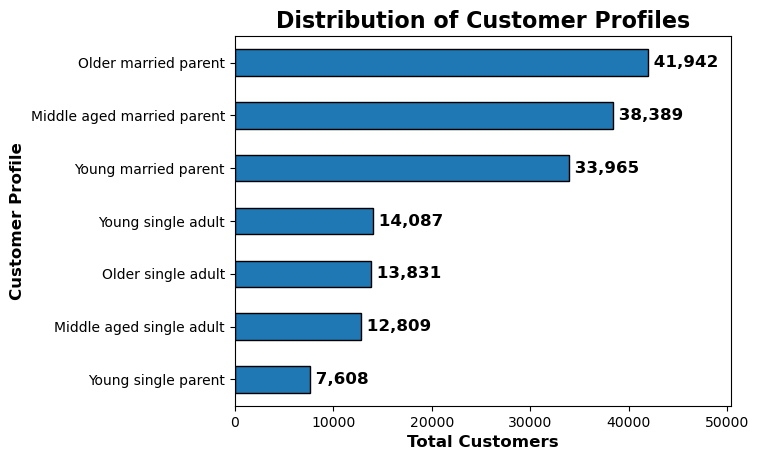

In [13]:
# create distribution chart for income_group

barh_cprofile_distr = ct_cprofile_distr.sort_values(by='Total', ascending=True).plot.barh(legend=None, linewidth=1, edgecolor='black')
for customer_profile in barh_cprofile_distr.containers:
    
    # adds commas
    for c in barh_cprofile_distr.containers:
        barh_cprofile_distr.bar_label(c, fmt=' {:,.0f}', fontweight='bold', fontsize=12)

# adds 20% whitespace to margins to keep labels inside the box
barh_cprofile_distr.margins(x=0.2)

plt.xlabel('Total Customers', fontsize=12, fontweight='bold')
plt.ylabel('Customer Profile', fontsize=12, fontweight='bold')
plt.title('Distribution of Customer Profiles', fontsize=16, fontweight='bold')

plt.xticks(rotation = 360)

In [14]:
# Export chart to the visualizations folder using savefig() function

barh_cprofile_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_cprofile_distr.png'), bbox_inches='tight')

In [ ]:
# exports opc_dep_5

opc_dep_5.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ic_final_df.pkl'))

In [ ]:
# imports ic_final_df

ic_final_df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ic_final_df.pkl'))

In [ ]:
# check output

ic_final_df.shape

In [ ]:
# shows all columns

pd.set_option('display.max_columns', None)

In [ ]:
ic_final_df.head()

<a id='14'></a> <br>
> # B. Distribution of departments

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000.]),
 [Text(0.0, 0, '0.0'),
  Text(2000000.0, 0, '0.2'),
  Text(4000000.0, 0, '0.4'),
  Text(6000000.0, 0, '0.6'),
  Text(8000000.0, 0, '0.8'),
  Text(10000000.0, 0, '1.0'),
  Text(12000000.0, 0, '1.2')])

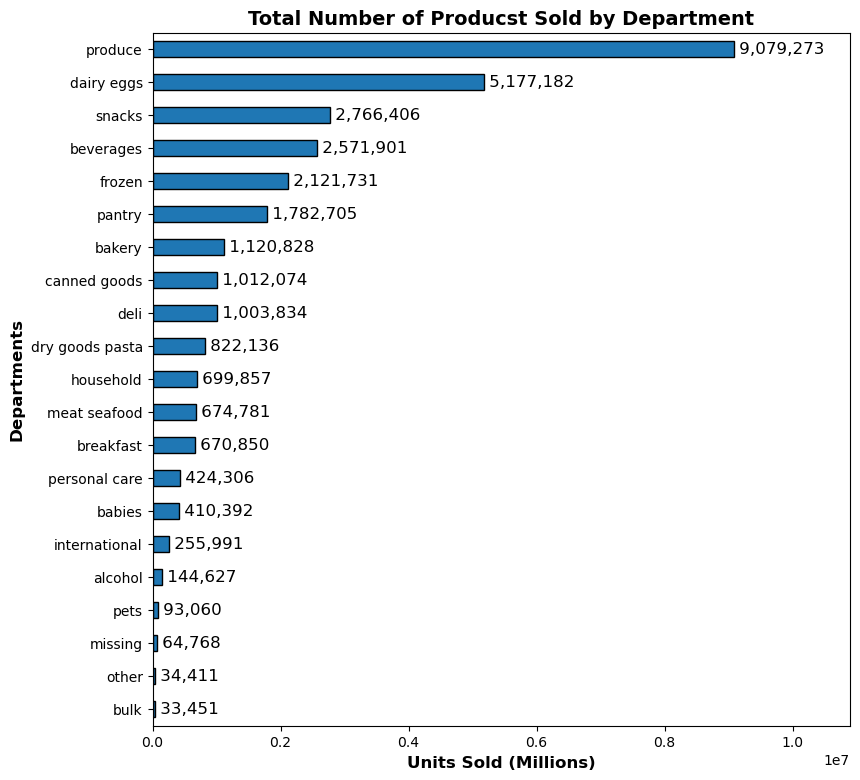

In [22]:
# creates bar graph of departments

bar_dep_distr = ic_final_df['department'].value_counts().sort_values().plot.barh(figsize=(9, 9), linewidth=1, edgecolor='black')
for department in bar_dep_distr.containers:
    
    # adds commas
    for c in bar_dep_distr.containers:
        bar_dep_distr.bar_label(c, fmt=' {:,.0f}', fontweight='medium', fontsize=12)

# adds 20% whitespace to margins to keep labels inside the box
bar_dep_distr.margins(x=0.2, y=0.3)

plt.xlabel('Units Sold (Millions)', fontsize=12, fontweight='bold')
plt.ylabel('Departments', fontsize=12, fontweight='bold')
plt.title('Total Number of Producst Sold by Department', fontsize=14, fontweight='bold')

plt.xticks(rotation = 360)

In [23]:
# Export chart to the visualizations folder using savefig() function

bar_dep_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_dep_distr.png'), bbox_inches='tight')

<a id='15'></a> <br>
> # C. Distribution of Products

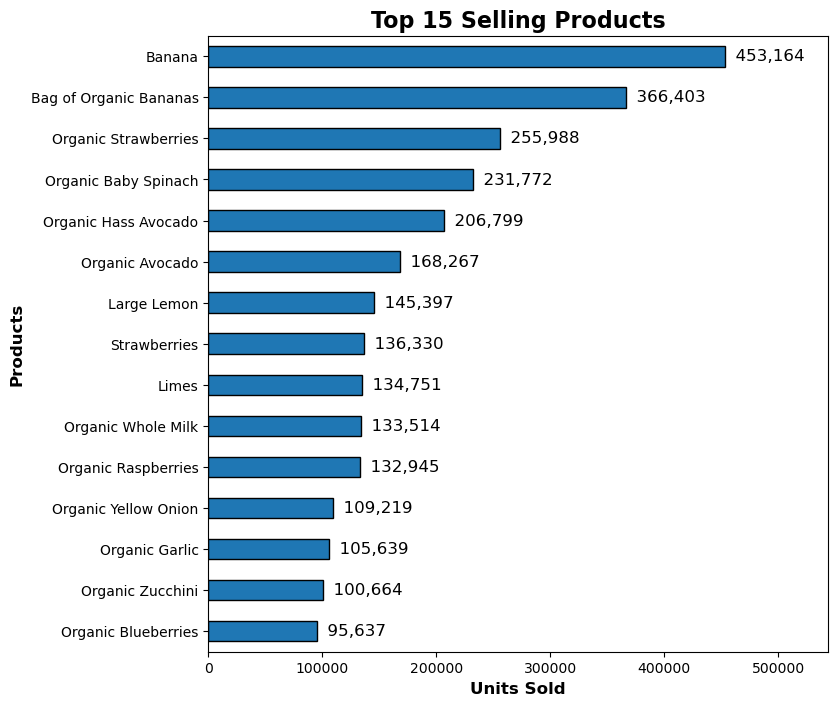

In [29]:
# creates bar graph of products

bar_prods_distr = ic_final_df['product_name'].value_counts().sort_values(ascending=0)[:15].plot.barh(figsize=(8, 8), linewidth=1, edgecolor='black')
for product_name in bar_prods_distr.containers:
    
    # adds commas
    for c in bar_prods_distr.containers:
        bar_prods_distr.bar_label(c, fmt='  {:,.0f}', fontweight='medium', fontsize=12)

# adds 20% whitespace to margins to keep labels inside the box
bar_prods_distr.margins(x=0.2, y=0.3)

plt.xlabel('Units Sold', fontsize=12, fontweight='bold')
plt.ylabel('Products', fontsize=12, fontweight='bold')
plt.title('Top 15 Selling Products', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()


In [30]:
# Export chart to the visualizations folder using savefig() function

bar_prods_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_prods_distr.png'), bbox_inches='tight')

<a id='16'></a> <br>
> # D. Customer Profile vs. Income Group 

In [31]:
# create new df with customer_profile, income_group and user_id only

prof_inc_grp_id_df = ic_final_df[['customer_profile','income_group', 'user_id']].copy()

In [32]:
# check output

prof_inc_grp_id_df.head()

,customer_profile,income_group,user_id
0,Young married parent,Low income,1
1,Young married parent,Low income,1
2,Young married parent,Low income,1
3,Young married parent,Low income,1
4,Young married parent,Low income,1


In [33]:
prof_inc_grp_id_df.shape

(30964564, 3)

In [34]:
# remove duplicates to pare down to only 1 instance of each user_id

prof_inc_grp_id_df = prof_inc_grp_id_df.drop_duplicates()

In [35]:
# check output

prof_inc_grp_id_df.shape

(162631, 3)

In [36]:
prof_inc_grp_id_df.head()

,customer_profile,income_group,user_id
0,Young married parent,Low income,1
59,Older single adult,Low income,15
131,Older married parent,High income,19
335,Older single adult,Middle income,21
540,Young married parent,Low income,31


In [37]:
prof_inc_grp_id_df.describe(include=['object', 'int', 'float'])

,customer_profile,income_group,user_id
count,162631,162631,162631
unique,7,3,162631
top,Older married parent,Middle income,1
freq,41942,103678,1


In [38]:
# remvoe user_id col - no longer needed

del prof_inc_grp_id_df['user_id']

In [39]:
# check output

prof_inc_grp_id_df.describe(include=['object', 'int', 'float'])

,customer_profile,income_group
count,162631,162631
unique,7,3
top,Older married parent,Middle income
freq,41942,103678


In [40]:
# creates a crosstab of customer_profile and income_group

ct_cprofile_incgr_distr = pd.crosstab(prof_inc_grp_id_df['customer_profile'], prof_inc_grp_id_df['income_group'])[['Low income', 'Middle income', 'High income']]

In [41]:
# check output

ct_cprofile_incgr_distr

income_group,Low income,Middle income,High income
customer_profile,,,
Middle aged married parent,6219,23524,8646
Middle aged single adult,2063,7795,2951
Older married parent,6379,25580,9983
Older single adult,2066,8450,3315
Young married parent,10295,23417,253
Young single adult,4348,9651,88
Young single parent,2297,5261,50


In [42]:
8646+6219+23524+2951+2063+7795+9983+6379+25580+3315+2066+8450+253+10295+23417+88+4348+9651+50+2297+5261

162631

In [43]:
ct_cprofile_incgr_distr

income_group,Low income,Middle income,High income
customer_profile,,,
Middle aged married parent,6219,23524,8646
Middle aged single adult,2063,7795,2951
Older married parent,6379,25580,9983
Older single adult,2066,8450,3315
Young married parent,10295,23417,253
Young single adult,4348,9651,88
Young single parent,2297,5261,50


In [44]:
ct_cprofile_incgr_distr = ct_cprofile_incgr_distr.sort_values(by='Middle income', ascending=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Young single parent'),
  Text(0, 1, 'Middle aged single adult'),
  Text(0, 2, 'Older single adult'),
  Text(0, 3, 'Young single adult'),
  Text(0, 4, 'Young married parent'),
  Text(0, 5, 'Middle aged married parent'),
  Text(0, 6, 'Older married parent')])

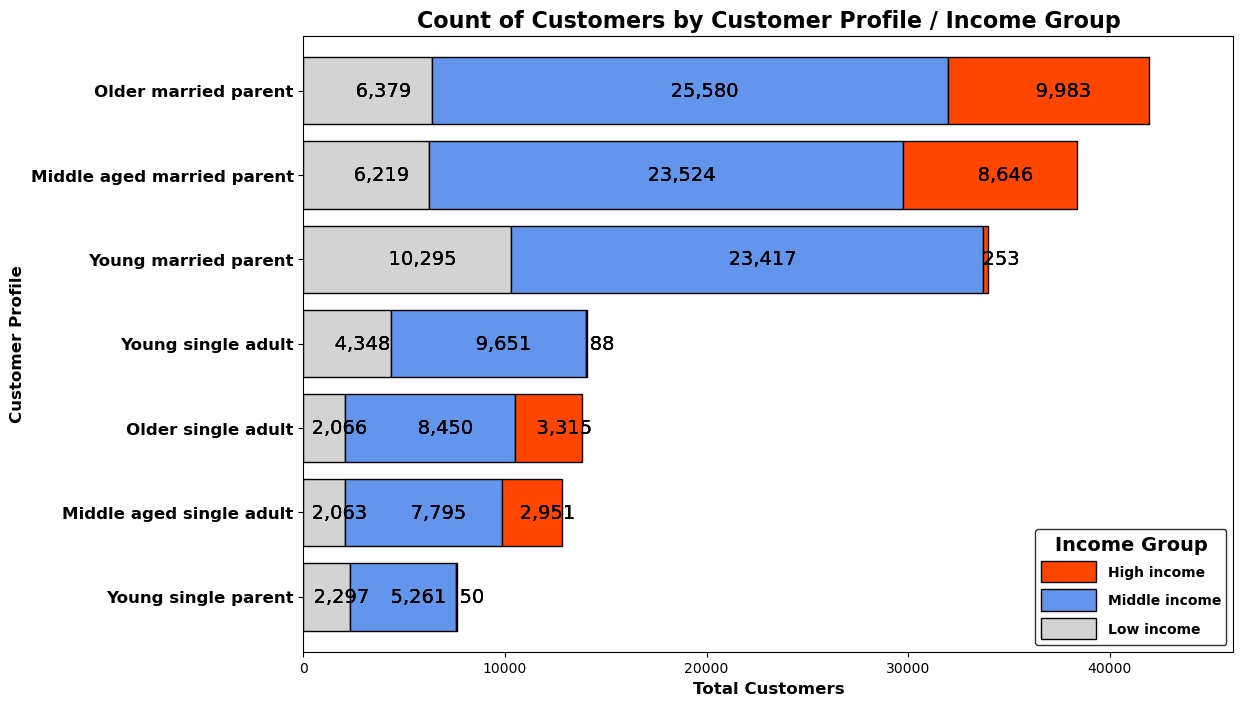

In [47]:
# create bar graph of cust_prof and inc_grp

barh_prof_inc_grp = ct_cprofile_incgr_distr.plot.barh(stacked=True, figsize=(12, 8) ,width=0.8, color=['lightgrey', 'cornflowerblue', 'orangered'], linewidth=1, edgecolor='black')
for customer_profile in barh_prof_inc_grp.containers:
    
    # adds commas
    for c in barh_prof_inc_grp.containers:
        barh_prof_inc_grp.bar_label(c, fmt='     {:,.0f}', fontweight='medium', fontsize=14, label_type='center')
   
    # adds 20% whitespace to margins to keep labels inside the box
    barh_prof_inc_grp.margins(x=0.1)

plt.xlabel('Total Customers', fontsize=12, fontweight='bold')
plt.ylabel('Customer Profile', fontsize=12, fontweight='bold')
plt.title('Count of Customers by Customer Profile / Income Group', fontsize=16, fontweight='bold')
plt.legend(title='Income Group', title_fontproperties={'weight':'bold', 'size':14}, reverse=True, handlelength=4, handleheight=2, prop={'weight': 'bold'}, edgecolor='black')

plt.xticks(rotation = 360)
plt.yticks(fontsize=12, fontweight='bold')

In [48]:
# Export chart to the visualizations folder using savefig() function

barh_prof_inc_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbarh_prof_inc_grp.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='17'></a> <br>
> # E. Income Group vs. Department

In [49]:
# creates a crosstab of income_group and department

crosst_incg_dept = pd.crosstab(ic_final_df['department'], ic_final_df['income_group'])[['Low income', 'Middle income', 'High income']]

In [50]:
# check outpt

crosst_incg_dept

income_group,Low income,Middle income,High income
department,,,
alcohol,24005,91125,29497
babies,47232,291772,71388
bakery,159115,766182,195531
beverages,514681,1643392,413828
breakfast,126429,434848,109573
bulk,6316,22210,4925
canned goods,127007,707738,177329
dairy eggs,748721,3551351,877110
deli,154614,681732,167488


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000.]),
 [Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1'),
  Text(2000000.0, 0, '2'),
  Text(3000000.0, 0, '3'),
  Text(4000000.0, 0, '4'),
  Text(5000000.0, 0, '5'),
  Text(6000000.0, 0, '6'),
  Text(7000000.0, 0, '7'),
  Text(8000000.0, 0, '8')])

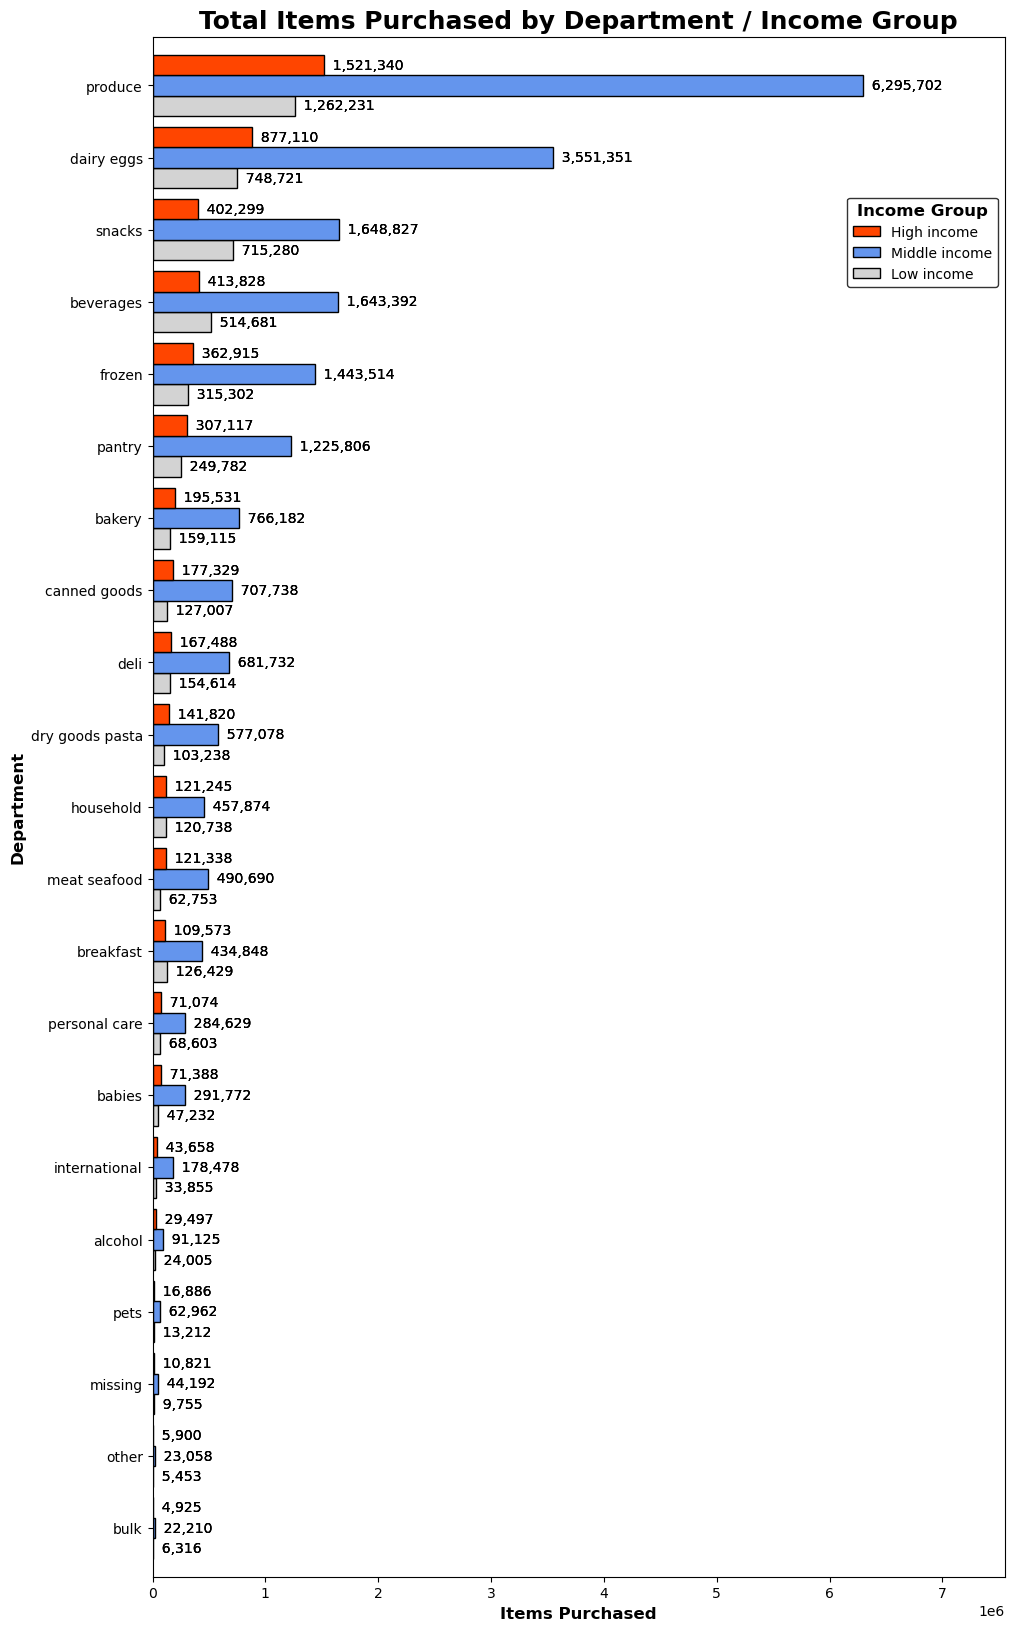

In [79]:
# creates bar chart of income_group and department

barh_incg_dept = crosst_incg_dept.loc[crosst_incg_dept.sum(axis=1).sort_values().index].plot.barh(width=.85, color=['lightgrey', 'cornflowerblue', 'orangered'], figsize=(11,20), linewidth=1, edgecolor='black')
for department in barh_incg_dept.containers:
    
    # adds commas
    for c in barh_incg_dept.containers:
        barh_incg_dept.bar_label(c, fmt='  {:,.0f}', fontweight='medium', fontsize=10)

    # adds 20% whitespace to margins to keep labels inside the box
    barh_incg_dept.margins(x=0.2)

plt.xlabel('Items Purchased', fontsize=12, fontweight='bold')
plt.ylabel('Department', fontsize=12, fontweight='bold')
plt.title('Total Items Purchased by Department / Income Group', fontsize=18, fontweight='bold')
plt.legend(title='Income Group', title_fontproperties={'weight':'bold', 'size':12}, bbox_to_anchor=(1, .9),  reverse=True, edgecolor='black')

plt.xticks(rotation = 360)

In [80]:
# Export chart to the visualizations folder using savefig() function

barh_incg_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_incg_dept.png'), bbox_inches='tight')

<a id='18'></a> <br>
> # F. Income Group vs. Age Group

In [61]:
# creates a crosstab of income_group and age_group

crosst_incg_agegr = pd.crosstab(ic_final_df['age_group'], ic_final_df['income_group']).reindex(['Young', 'Middle aged', 'Older'])[['Low income', 'Middle income', 'High income']]

In [62]:
# check output

crosst_incg_agegr

income_group,Low income,Middle income,High income
age_group,,,
Young,2734015,7823018,108077
Middle aged,1060256,6299571,2365123
Older,1074051,6800571,2699882


(array([0, 1, 2]),
 [Text(0, 0, 'Middle aged'), Text(0, 1, 'Older'), Text(0, 2, 'Young')])

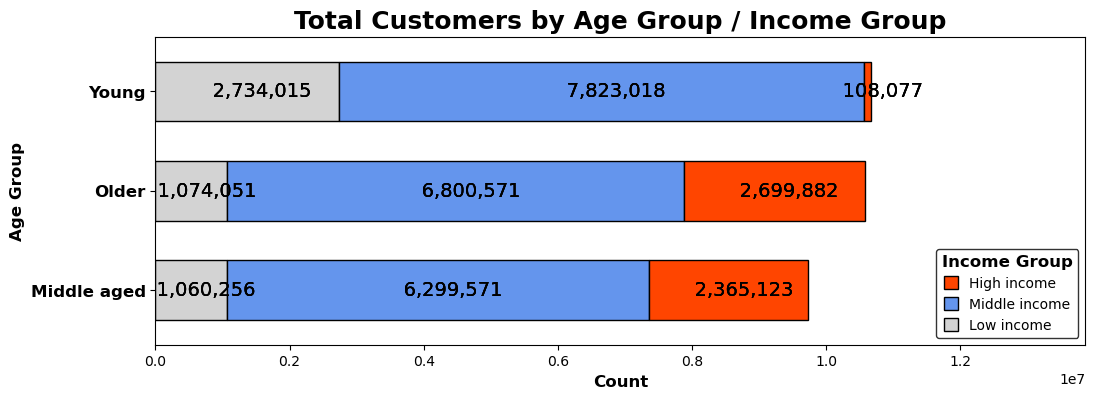

In [77]:
# creates stacked bar chart of income_group and age_group

sbar_incg_agegrp = crosst_incg_agegr.loc[crosst_incg_agegr.sum(axis=1).sort_values().index].plot.barh(stacked=True, figsize=(12, 4), width=0.6, color=['lightgrey', 'cornflowerblue', 'orangered'], linewidth=1, edgecolor='black')
for age_group in sbar_incg_agegrp.containers:
    
    # adds commas
    for c in sbar_incg_agegrp.containers:
        sbar_incg_agegrp.bar_label(c, fmt='     {:,.0f}', fontweight='medium', fontsize=14, label_type='center')
   
    # adds whitespace to margins to keep labels inside the box
    sbar_incg_agegrp.margins(x=0.3)
    
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.title('Total Customers by Age Group / Income Group', fontsize=18, fontweight='bold')
plt.legend(loc='lower right', title='Income Group', title_fontproperties={'weight':'bold', 'size':12}, reverse=True, handlelength=1, handleheight=1, prop={'size':10}, edgecolor='black')

plt.xticks(rotation = 360)
plt.yticks(fontsize=12, fontweight='bold')

In [81]:
# Export chart to the visualizations folder using savefig() function

sbar_incg_agegrp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbarh_incg_agegrp.png'), bbox_inches='tight')